In [1]:
import numpy as np
import pandas as pd
import matplotlib as matplot
import nltk

## Question 1

In [2]:
en_df = pd.read_csv('../data/CONcreTEXT_trial_EN.tsv', sep='\t') # load data files
it_df = pd.read_csv('../data/CONcreTEXT_trial_IT.tsv', sep='\t')

## Question 2

In [3]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
en_df['TOKENS'] = en_df['TEXT'].apply(tokenizer.tokenize).apply(lambda words: ' '.join(words)).apply(lambda x: x.lower())
it_df['TOKENS'] = it_df['TEXT'].apply(tokenizer.tokenize).apply(lambda words: ' '.join(words)).apply(lambda x: x.lower())

In [4]:
en_df['TOKENS']

0     bring up academic achievements awards and othe...
1     please list people you have helped your person...
2           add activated carbon straight to your vodka
3     place sensors around your garden and when a ca...
4     look for a partner that shares your level of a...
                            ...                        
95       rinse your face with warm water and pat it dry
96    staying mentally strong means winning half the...
97    the person who has the highest score wins the ...
98    for the most part men and women wear the same ...
99    look at the woman whom you are listening to fo...
Name: TOKENS, Length: 100, dtype: object

In [5]:
it_df['TOKENS']

0     guardati i piedi o fai finta di essere affasci...
1     sei affascinato dal funzionamento della mente ...
2     pensa ai tuoi sentimenti di amore passione e l...
3     quasi tutti sono in grado di ricevere amore e ...
4     accendi il condizionatore sull aria fredda ma ...
                            ...                        
95    in un modo o nell altro la verità viene sempre...
96    organizza dei viaggi nel fine settimana quando...
97    pesa le tue valigie prima del viaggio per evit...
98    è molto importante non perdere di vista la pro...
99    i conigli hanno un ottimo udito e un ottima vi...
Name: TOKENS, Length: 100, dtype: object

## Question 3

In [6]:
en_df['WORD_COUNT'] = en_df['TOKENS'].apply(tokenizer.tokenize).apply(lambda token_list: len(token_list))
it_df['WORD_COUNT'] = it_df['TOKENS'].apply(tokenizer.tokenize).apply(lambda token_list: len(token_list))

en_sum = 0
it_sum = 0

for count in en_df['WORD_COUNT']:
    en_sum += count

for count in it_df['WORD_COUNT']:
    it_sum += count

print('English Word Count: %s\nItalian Word Count: %d' % (en_sum, it_sum))

English Word Count: 1314
Italian Word Count: 1306


## Question 4

In [7]:
en_words = [word for sentence in en_df['TOKENS'].apply(tokenizer.tokenize) for word in sentence]
it_words = [word for sentence in it_df['TOKENS'].apply(tokenizer.tokenize) for word in sentence]

en_unique = []
it_unique = []

for word in en_words:
    if word not in en_unique:
        en_unique.append(word)

for word in it_words:
    if word not in it_unique:
        it_unique.append(word)

print('English Unique Word Count: %s\nItalian Unique Word Count: %d' % (len(en_unique), len(it_unique)))

English Unique Word Count: 641
Italian Unique Word Count: 711


## Question 5

In [8]:
# Calculating occurences
en_unique_df = pd.DataFrame(en_unique, columns=['Word'])
en_unique_df['Occurences'] = [0]*len(en_unique_df)

en_unique_df = en_unique_df.set_index('Word', drop=False)

for word in en_words:
    en_unique_df.at[word,'Occurences'] += 1
    
en_unique_df = en_unique_df.sort_values('Occurences', ascending=False)
en_unique_df.index = np.arange(0, len(en_unique_df))

en_unique_df['Rank'] = np.arange(1, len(en_unique_df) + 1)
en_unique_df['Probability'] = [occurences / len(en_words) for occurences in en_unique_df['Occurences']]
en_unique_df['ZIPF'] = [rank * en_unique_df.at[rank - 1, 'Probability'] for rank in en_unique_df['Rank']]

pd.options.display.max_rows = None
en_frequent = []
m_counter = 0

for index in en_unique_df.index:
    word = en_unique_df.loc[index]
    if index < 25 or (word['Word'][0] == 'm' and m_counter < 25):
        if index > 25: 
            m_counter += 1
        en_frequent.append(word)

en_frequent_df = pd.DataFrame(en_frequent)
en_frequent_df

,Word,Occurences,Rank,Probability,ZIPF
0,the,63,1,0.047945,0.047945
1,you,45,2,0.034247,0.068493
2,a,39,3,0.029680,0.089041
3,to,36,4,0.027397,0.109589
4,your,35,5,0.026636,0.133181
5,and,33,6,0.025114,0.150685
6,of,29,7,0.022070,0.154490
7,in,20,8,0.015221,0.121766
8,or,19,9,0.014460,0.130137
9,can,14,10,0.010654,0.106545


In [9]:
# Calculating occurences
it_unique_df = pd.DataFrame(it_unique, columns=['Word'])
it_unique_df['Occurences'] = [0]*len(it_unique_df)

it_unique_df = it_unique_df.set_index('Word', drop=False)

for word in it_words:
    it_unique_df.at[word,'Occurences'] += 1
    
it_unique_df = it_unique_df.sort_values('Occurences', ascending=False)
it_unique_df.index = np.arange(0, len(it_unique_df))

it_unique_df['Probability'] = [occurences / len(it_words) for occurences in it_unique_df['Occurences']]
it_unique_df['Rank'] = np.arange(1, len(it_unique_df) + 1)
it_unique_df['ZIPF'] = [rank * it_unique_df.at[rank - 1, 'Probability'] for rank in it_unique_df['Rank']]

pd.options.display.max_rows = None
it_frequent = []
m_counter = 0

for index in it_unique_df.index:
    word = it_unique_df.loc[index]
    if index < 25 or (word['Word'][0] == 'm' and m_counter < 25):
        if index > 25: 
            m_counter += 1
        it_frequent.append(word)

it_frequent_df = pd.DataFrame(it_frequent)
it_frequent_df

,Word,Occurences,Probability,Rank,ZIPF
0,di,51,0.039051,1,0.039051
1,e,33,0.025268,2,0.050536
2,la,31,0.023737,3,0.071210
3,un,28,0.021440,4,0.085758
4,in,21,0.016080,5,0.080398
5,il,21,0.016080,6,0.096478
6,per,19,0.014548,7,0.101838
7,che,18,0.013783,8,0.110260
8,i,17,0.013017,9,0.117152
9,a,17,0.013017,10,0.130168


## Question 6

This corpus complies with Zipf's law. Observe the graphs below. You can see that the frequency of the first words (the, di) are very high, then we see a sharp decline approaching 0. This is indeed an exponentially decreasing function, which corresponds with the halving we use in Zipf's law. Also note how the first 10 words, theres a very clear halving going on. After that, it's harder to distinguish due to the smaller size of the corpus. However, once in the context for the whole graph, we see that wonderful curved L shape we have come to associate with Zipf's

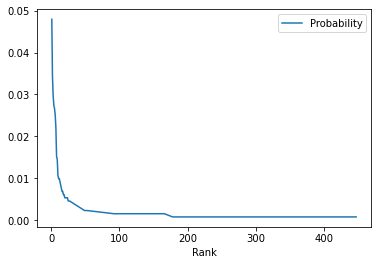

In [20]:
en_frequent_df.plot.line(x='Rank', y='Probability')

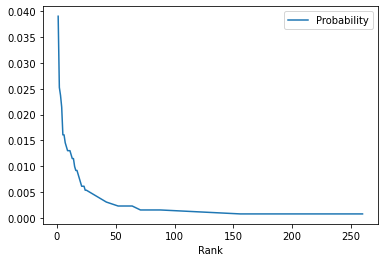

In [21]:
it_frequent_df.plot.line(x='Rank', y='Probability')